In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings

import statsmodels.api as sm

alpha = 0.05

data_path = os.path.join("data", "jamboree_dataset.csv")

df = pd.read_csv(data_path)

In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
warnings.filterwarnings('ignore')

## Data Dictionary
- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [4]:
def null_checker(p, alpha =0.05):
    
    # Hypothesis significance checker code
    if p<alpha:
        print("Reject the null hypothesis")
    else:
        print("Failed to Reject the null hypothesis")

def qq_plot(x):
    # Code to draw qqplots for univariate analysis
    m = x.name
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = x.to_list()
    res = stats.probplot(x, dist=stats.norm, plot=ax)
    
    ax.set_title(f"Probplot for normal dist for {m}")

# What does good looks like?

- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
- Use Non-graphical and graphical analysis for getting inferences about variables.
- This can be done by checking the distribution of variables of graduate applicants.
- Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
- Check correlation among independent variables and how they interact with each other.
- Use Linear Regression from (Statsmodel library) and explain the results.
- Test the assumptions of linear regression:
- 1. Multicollinearity check by VIF score
- 2. Mean of residuals
- 3. Linearity of variables (no pattern in residual plot)
- 4. Test for Homoscedasticity
- 5. Normality of residuals
- Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
- Provide actionable Insights & Recommendations
- Try out different Linear Regressions

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## Exploratory Data Analysis

### Coverage

- Definition of problem (as per given problem statement with additional views)
- Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
- Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
- Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
- Illustrate the insights based on EDA
- 1. Comments on range of attributes, outliers of various attributes
- 2. Comments on the distribution of the variables and relationship between them
- 3. Comments for each univariate and bivariate plots

### Problem Statement:

Jamboree intends to understand and help IVY League aspirants prepare for the key factors that are important in their graduate admissions and how these factors are interrelated among themselves. 

This will help them sell and cross-sell a variety of products for various requirements. This will also help predict one's chances of admission given the rest of the variables given their progress across different product modules.

In [6]:
# The shape of dataset is 500 rows and 9 columns
df.shape

(500, 9)

In [7]:
# Serial No. doesn't add any value in the analysis going forward
df.drop(columns=['Serial No.'], inplace=True)

In [8]:
#checking datatypes
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
df.info()
# No missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


In [11]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [12]:
df['LOR '].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [13]:
cat_cols = ['University Rating', 'Research', 'SOP', 'LOR ']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target_cols = ['Chance of Admit ']

In [14]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100

# No missing values found

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [15]:
# check for duplicates
df.duplicated().sum()

0

In [16]:
df[num_cols].describe()

,GRE Score,TOEFL Score,CGPA
count,500.000000,500.000000,500.000000
mean,316.472000,107.192000,8.576440
std,11.295148,6.081868,0.604813
min,290.000000,92.000000,6.800000
25%,308.000000,103.000000,8.127500
50%,317.000000,107.000000,8.560000
75%,325.000000,112.000000,9.040000
max,340.000000,120.000000,9.920000


### Univariate Analysis

In [17]:
# check unique values in categorical variables
for col in cat_cols:
    print("Column:  {:20}   Unique values: {}".format(col, df[col].nunique()))

Column:  University Rating      Unique values: 5
Column:  Research               Unique values: 2
Column:  SOP                    Unique values: 9
Column:  LOR                    Unique values: 9


reject the null hypothesis that GRE Score is normal with p-value as 0.0
Distribution Plot for column: GRE Score



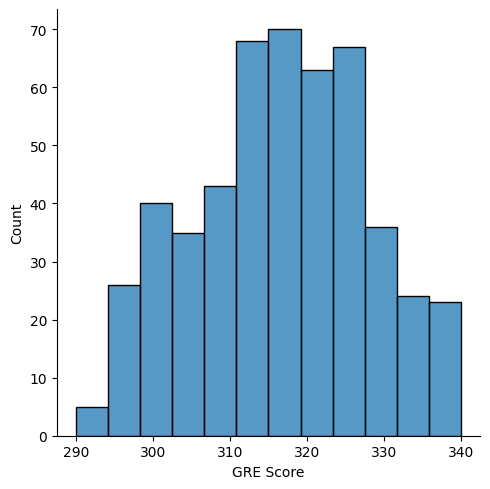

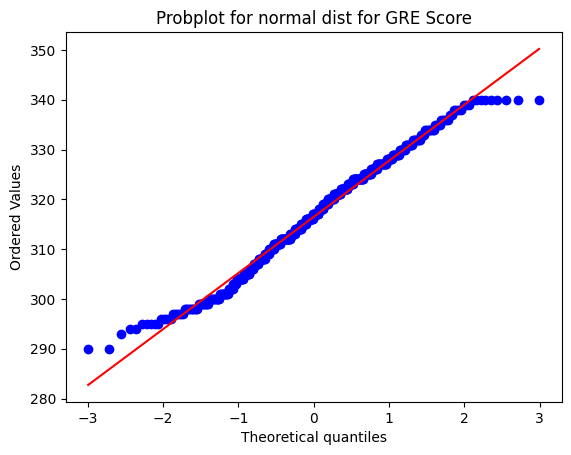

reject the null hypothesis that TOEFL Score is normal with p-value as 0.0
Distribution Plot for column: TOEFL Score



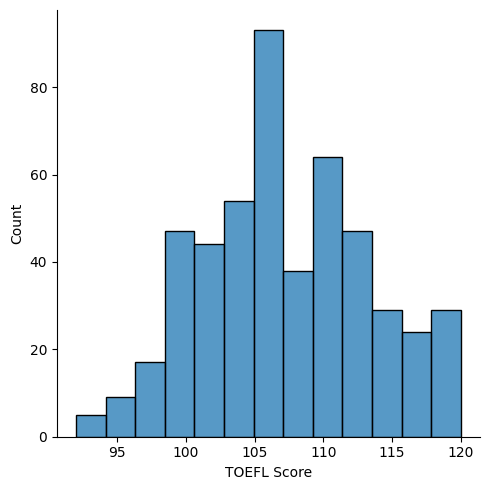

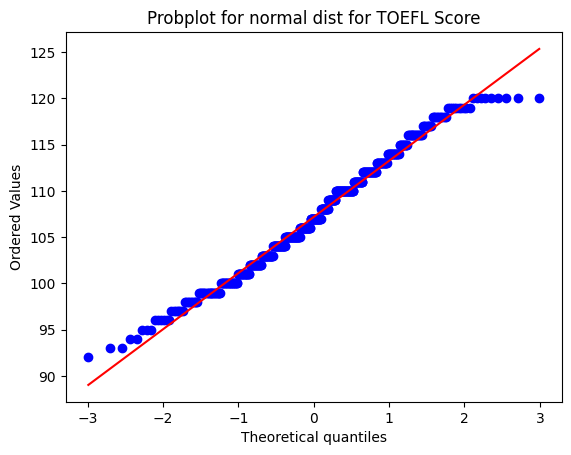

reject the null hypothesis that CGPA is normal with p-value as 0.0
Distribution Plot for column: CGPA



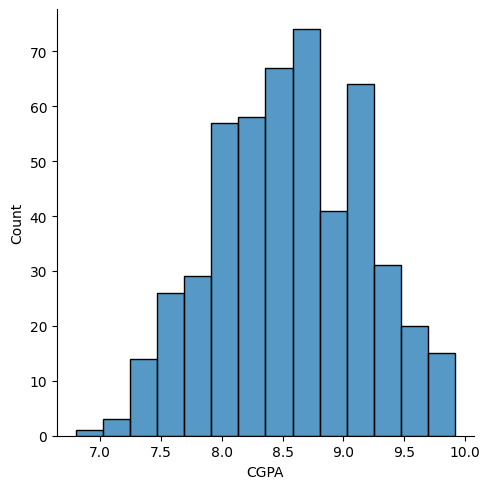

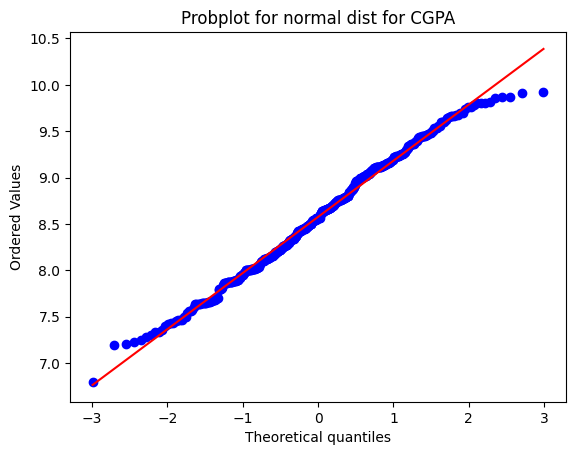

reject the null hypothesis that Chance of Admit  is normal with p-value as 0.0
Distribution Plot for column: Chance of Admit 



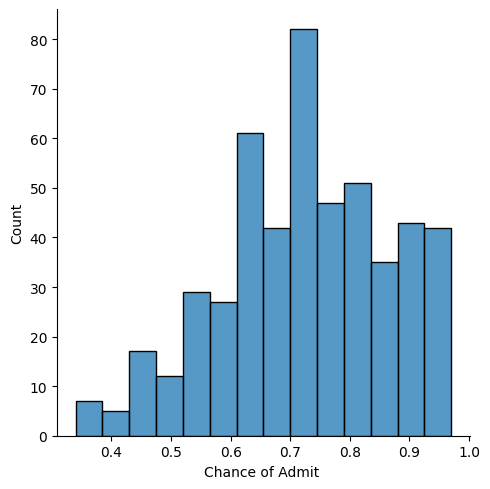

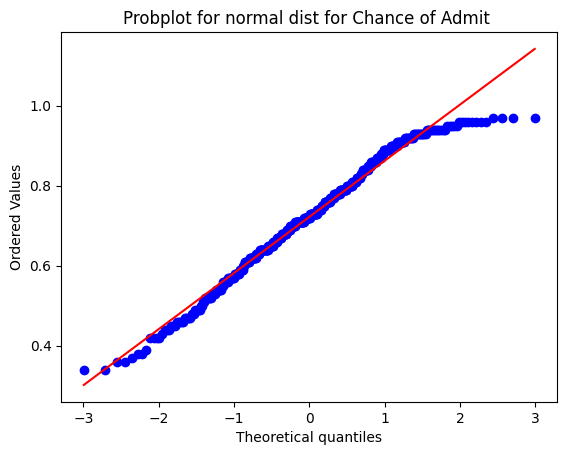

In [18]:
for i in num_cols+target_cols:
    statistic, p = stats.kstest(df[i],stats.norm.cdf)
    if p< alpha:
        print(f"reject the null hypothesis that {i} is normal with p-value as {round(p, 3)}")
    else:
        print(f"Failed to reject the null hypothesis that {i} is normal with p-value as {round(p, 3)}")
    print(f"Distribution Plot for column: {i}\n")
    sns.displot(df[i])
    qq_plot(x=df[i])
    plt.show()

# Neither of the declared numerical variables follow normal distribution

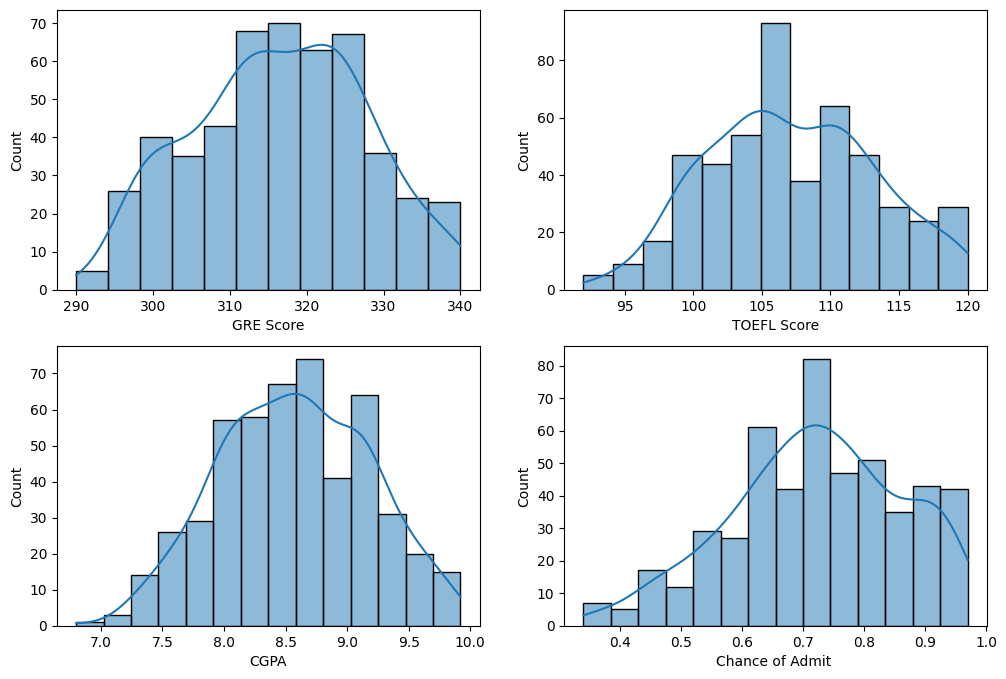

In [19]:
# check distribution of each numerical variable
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_cols[index]], kde=True, ax=axs[row,col])
        index += 1
    break
        
sns.histplot(df[num_cols[-1]], kde=True, ax=axs[1,0])
sns.histplot(df[target_cols[0]], kde=True, ax=axs[1,1])
plt.show()

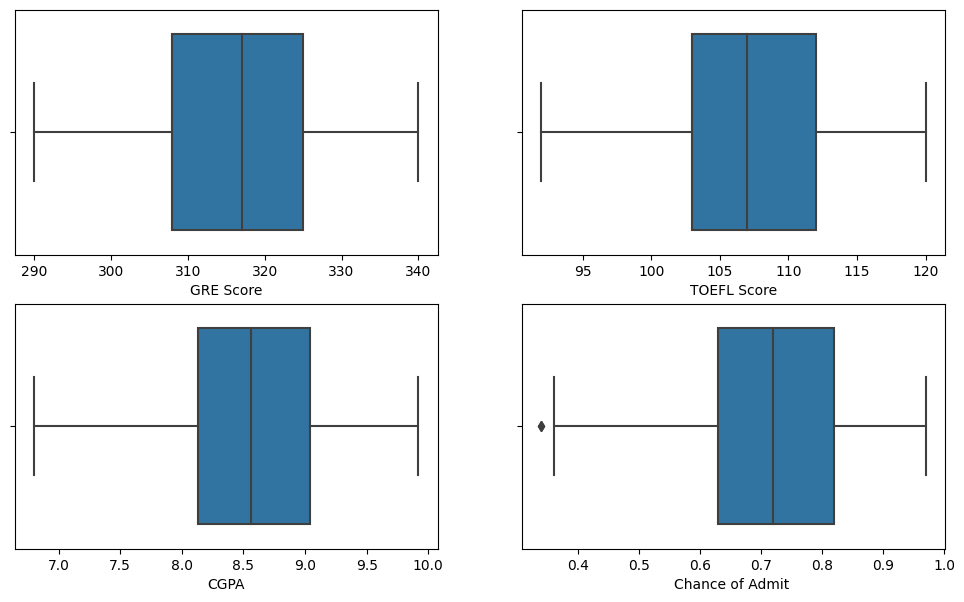

In [20]:
# check for outliers using boxplots
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=df, ax=axs[0,index])
    index += 1
    
sns.boxplot(x=num_cols[-1], data=df, ax=axs[1,0])
sns.boxplot(x=target_cols[0], data=df, ax=axs[1,1])
plt.show()

In [21]:
num_cols

['GRE Score', 'TOEFL Score', 'CGPA']

### Bivariate Analysis

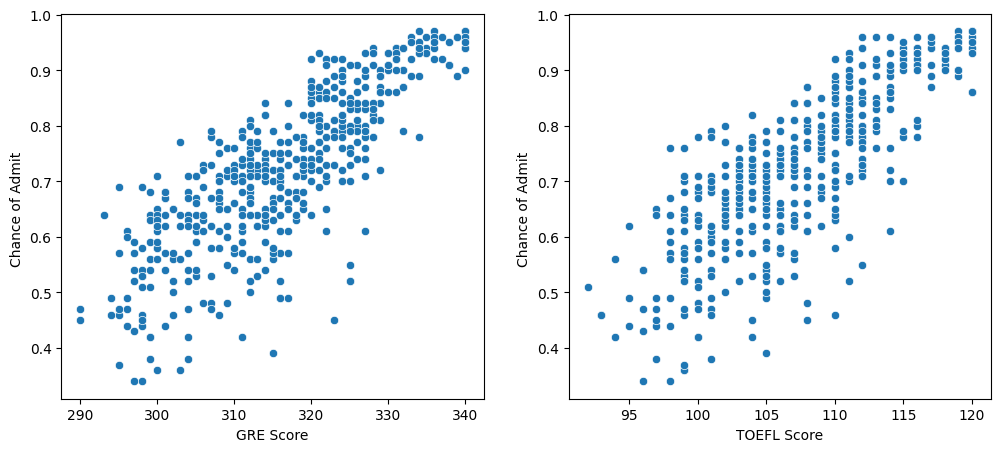

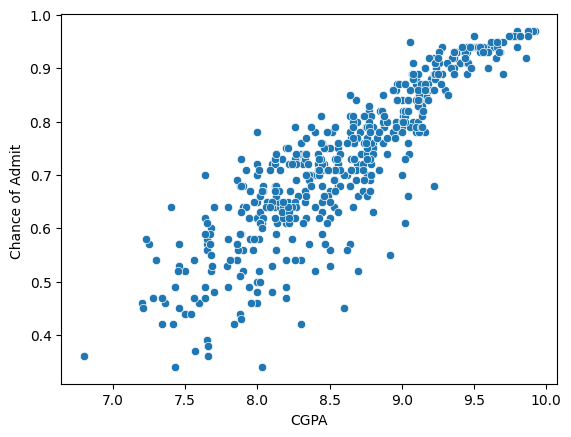

In [22]:
# check relation bw continuous variables & target variable
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=num_cols[0], y=target_cols[0], data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target_cols[0], data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target_cols[0], data=df)
plt.show()

# Seems like there is a linear correlation between the continuous variables and the target variable.

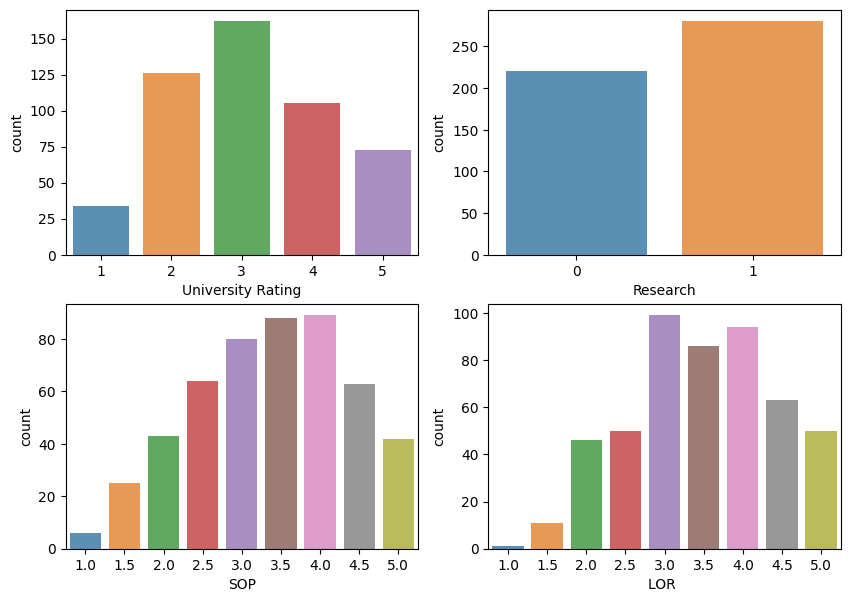

In [23]:
# countplots for categorical variables
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[row, col], alpha=0.8)
        index += 1
        
plt.show()

# Not much to observe from these countplots

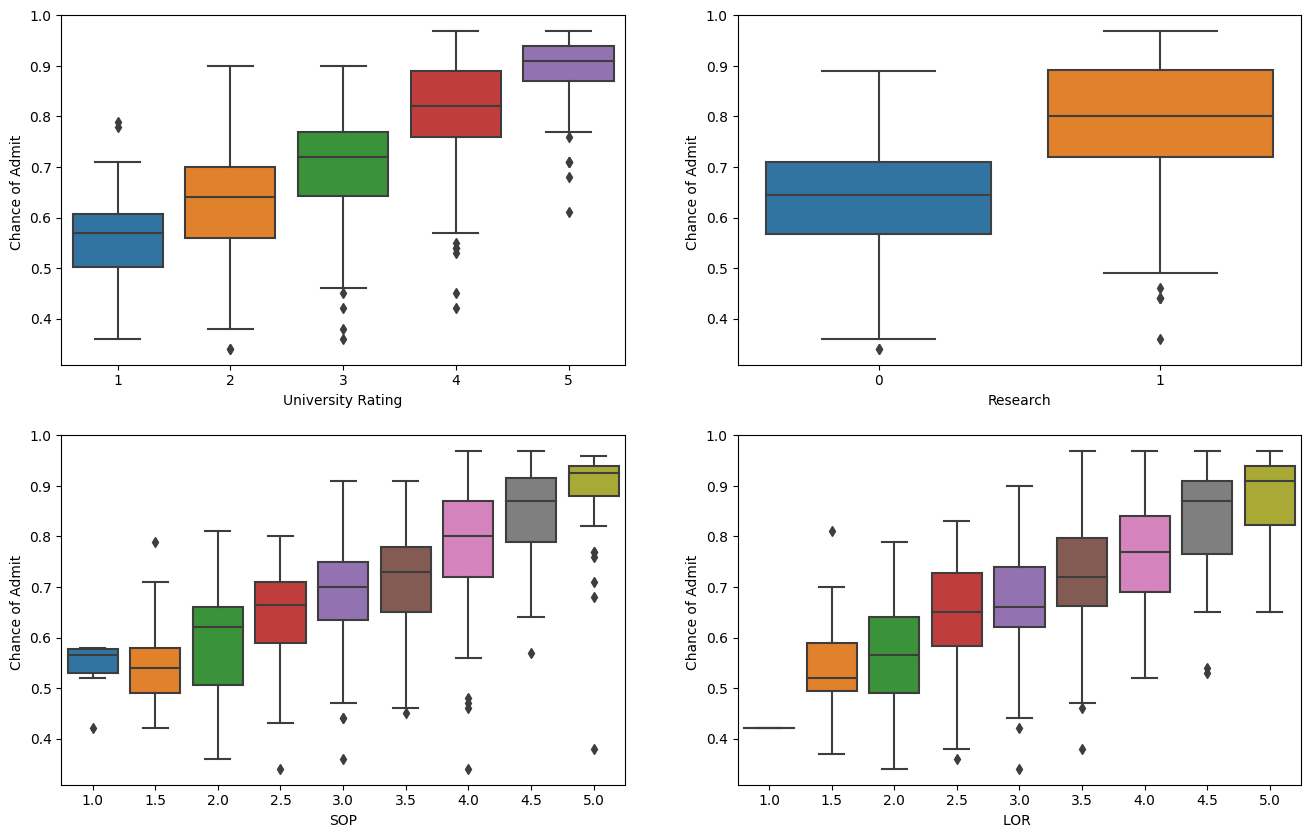

In [24]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target_cols[0], data=df, ax=axs[row,col])
        index += 1

# Since most of these values are except Research Variable are all postively impacting ratings. 
# So, the more they are the better the chances are for selection.
# If a candidate has done research work then that significantly increases the probabiliy of selection as per the graphical representation.

### Multivariate Analysis

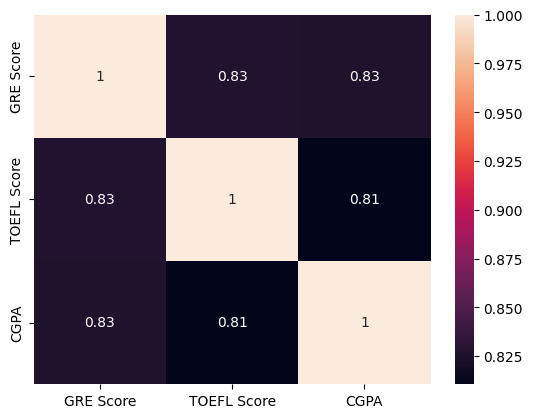

In [25]:
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

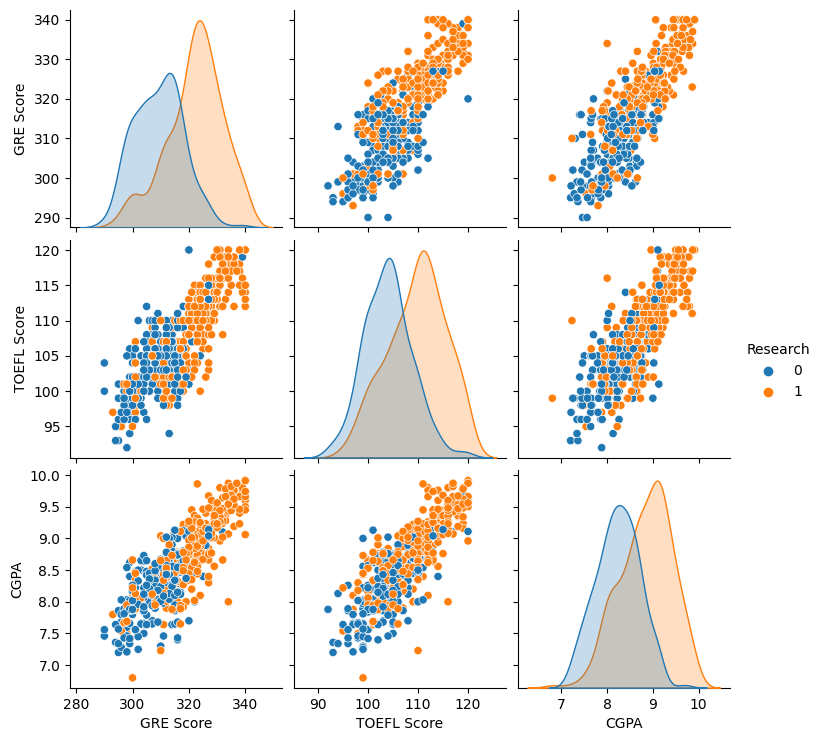

In [26]:
# pairplot

sns.pairplot(df[num_cols+['Research']], hue='Research')
plt.show()

# All these numerical variables seems to be having high interdependence among each other as they are highly correlated with each other.

In [27]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [28]:
def multivar_scatterplot(x, y, z, df=df):
    kf = df
    # print(kf.head())
    corr = round(kf[x].corr(kf[y]), 2)
    fig = sns.scatterplot(x=x,y=y,data=kf, hue=z)
    plt.title(f"{x} vs {y} Score with correlation: {corr}")
    fig.legend(title=z, labels=kf[z].unique())
    plt.show()



In [29]:
df['Research'].unique()

array([1, 0])

# 

In [30]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

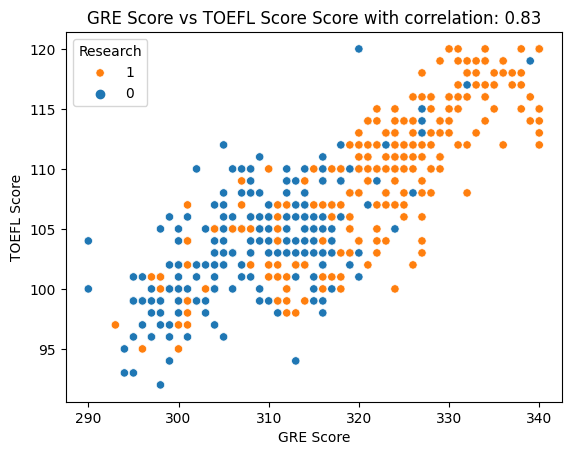

In [31]:

multivar_scatterplot(x='GRE Score', y='TOEFL Score', z='Research', df=df)

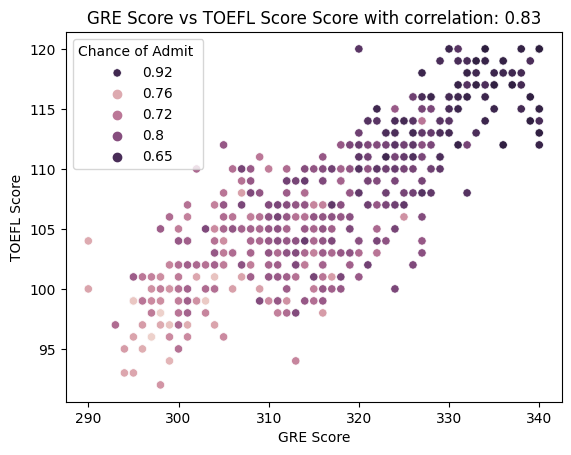

In [32]:
multivar_scatterplot(x='GRE Score', y='TOEFL Score', z='Chance of Admit ')

- Seeing the above two visuals, we can safely say that with research work there is a definite increase in Chance of Admission. It reflects the congnitive ability of a student to think and have potential merit for selection.


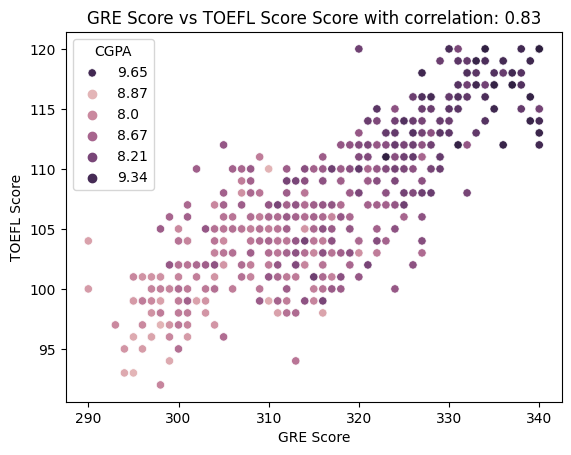

In [33]:
multivar_scatterplot(x='GRE Score', y='TOEFL Score', z='CGPA')

In [34]:
num_cols

['GRE Score', 'TOEFL Score', 'CGPA']

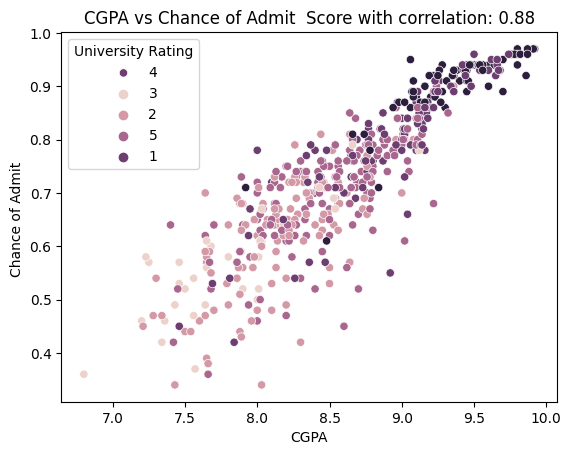

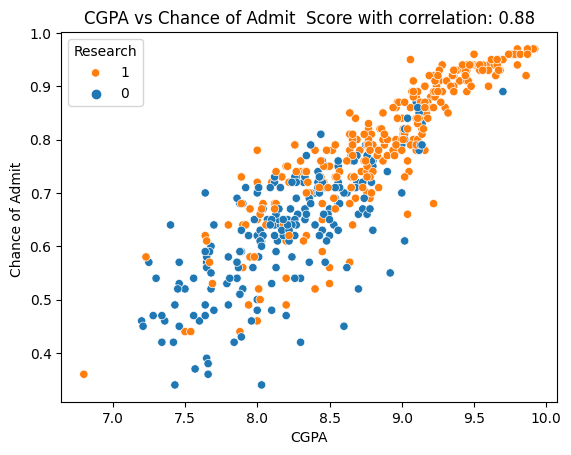

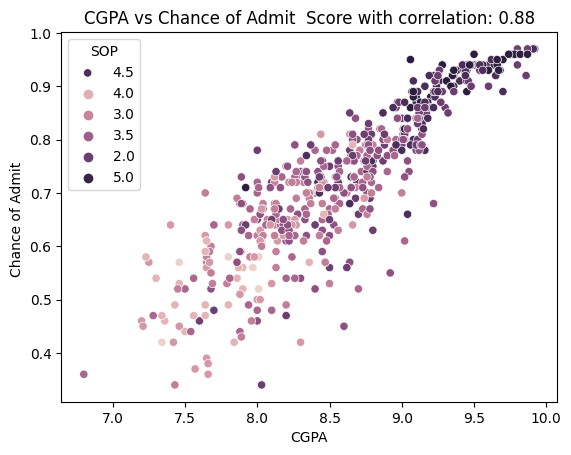

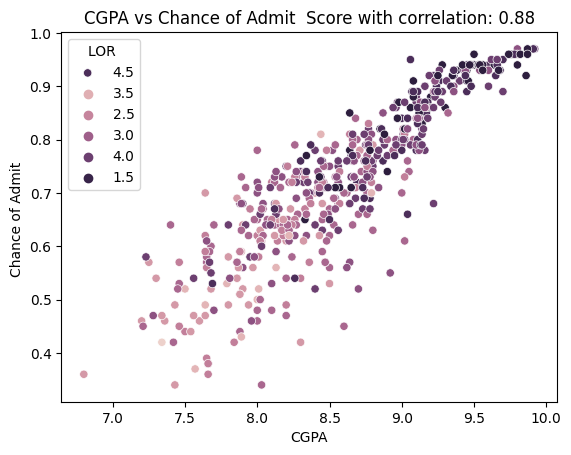

In [35]:
corr_nums_dict = {i : df['Chance of Admit '].corr(df[i]) for i in num_cols}


max_key = max(corr_nums_dict, key=lambda k: corr_nums_dict[k])


for y in cat_cols:
    multivar_scatterplot(x=max_key, y='Chance of Admit ', z=y)

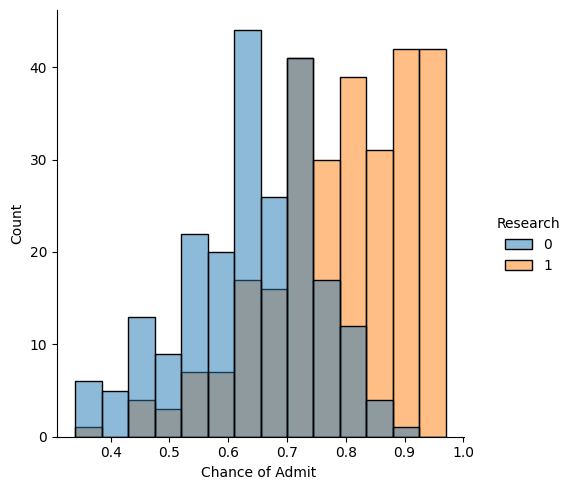

In [36]:
sns.displot(x=df['Chance of Admit '], hue=df['Research'])

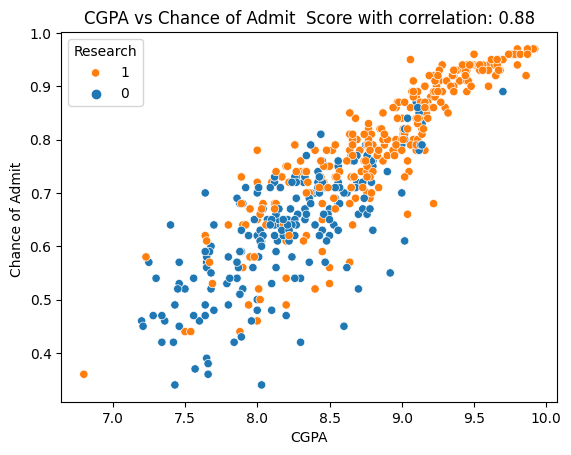

In [37]:
multivar_scatterplot(x='CGPA', y='Chance of Admit ', z='Research')

In [38]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## Assumptions Testing

### Mutlicollinearity Check

In [39]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data

vif(newdf=df.iloc[:,:-1])

,feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [40]:
# lets drop the LOR as well
newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR '], axis=1)
res = vif(newdf)
res

,feature,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [41]:
# drop the University Rating

res = vif(newdf.drop(columns=['University Rating']))
res

,feature,VIF
0,CGPA,2.455008
1,Research,2.455008


## Model Building

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
X = df.drop(columns=target_cols)
y = df[target_cols[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     224.1
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          1.27e-123
Time:                        19:45:20   Log-Likelihood:                 500.20
No. Observations:                 350   AIC:                            -984.4
Df Residuals:                     342   BIC:                            -953.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7252      0.003    231.404      0.0

In [54]:
X = df[['CGPA', 'Research']]
y = df[target_cols[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     628.1
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          4.83e-116
Time:                        19:46:37   Log-Likelihood:                 466.97
No. Observations:                 350   AIC:                            -927.9
Df Residuals:                     347   BIC:                            -916.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7252      0.003    211.978      0.0

In [46]:
import numpy as np
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)
        
    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res

In [47]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
def train_model(X_train, y_train, X_test, y_test,cols, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    #print(len(df.columns), len(model.coef_))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*50)
    return model
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "linear_regression",  0.001)


----   Linear_Regression Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.7252000000000001
              Column      Coef
0          GRE Score  0.018585
1        TOEFL Score  0.023325
2  University Rating  0.011482
3                SOP -0.001020
4               LOR   0.012711
5               CGPA  0.063122
6           Research  0.013995
--------------------------------------------------


LinearRegression()

In [48]:
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "ridge")


----   Ridge Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.7252000000000001
              Column      Coef
0          GRE Score  0.018817
1        TOEFL Score  0.023386
2  University Rating  0.011510
3                SOP -0.000819
4               LOR   0.012745
5               CGPA  0.062512
6           Research  0.014014
--------------------------------------------------


Ridge()

In [49]:
import requests

headers = {
    'sec-ch-ua': '"Not/A)Brand";v="99", "Google Chrome";v="115", "Chromium";v="115"',
    'DNT': '1',
    'x-csrf-token': 'a87db9f7',
    'sec-ch-ua-mobile': '?0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
    'Accept': 'application/json, text/plain, */*',
    'Referer': '',
    'accept-version': '7.21.0',
    'sec-ch-ua-platform': '"Windows"',
}

response = requests.get(
    'https://api.tickertape.in/search?text=hdfc&types=stock&pageNumber=0',
    headers=headers,
)

response.text

ModuleNotFoundError: No module named 'requests'